In [5]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using StatsBase#, JLD
using PlotlyJS

### Approximate SyncRank with sparsified Laplacian 


MUN graph model

least eigval of Laplacian= 0.016469679303707054
k = 249 vs nb edges= 492
 
method: DPP(K) unif
least eigenvalue of sparsifier: 0.0007251766866873195
least eigenvalue of sparsifier: 0.013003108548851134
least eigenvalue of sparsifier: 0.010224220529431385
least eigenvalue of sparsifier: 

0.015711046130084148
least eigenvalue of sparsifier: 0.014598696793326787
least eigenvalue of sparsifier: 0.014965608678918
least eigenvalue of sparsifier: 0.01632765794138919
method: DPP(K) JL-LS
least eigenvalue of sparsifier: 0.00016014806459597151
least eigenvalue of sparsifier: 

0.00796257472708033
least eigenvalue of sparsifier: 0.012673107902187383
least eigenvalue of sparsifier: 0.012972866591474435
least eigenvalue of sparsifier: 0.012720066606311734
least eigenvalue of sparsifier: 

0.014556582278565822
least eigenvalue of sparsifier: 0.015848427786494743
method: iid JL-LS
least eigenvalue of sparsifier: 0.00012468718400059688
least eigenvalue of sparsifier: 0.0007160944964849118
least eigenvalue of sparsifier: 0.009914833466463654
least eigenvalue of sparsifier: 

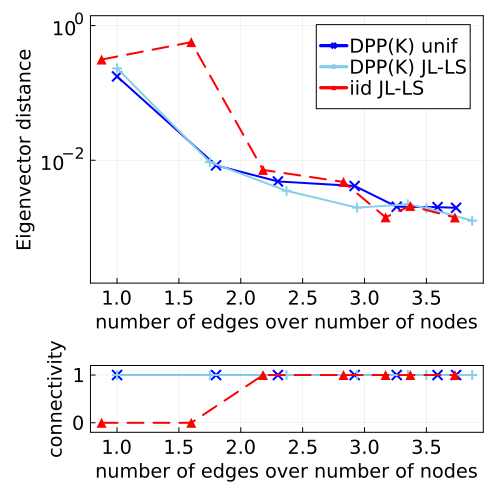

0.010518808856656629
least eigenvalue of sparsifier: 0.012363873018516516
least eigenvalue of sparsifier: 0.012526493121016013
least eigenvalue of sparsifier: 0.012571448274124163


"syncrank_err_MUNn100p0.1eta0.3q0"

In [32]:
type = "MUN" 

rng = Random.default_rng()

# graph parameters
n = 100
p = 0.1
eta = 0.3

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
check_connected = true
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving plot
# savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

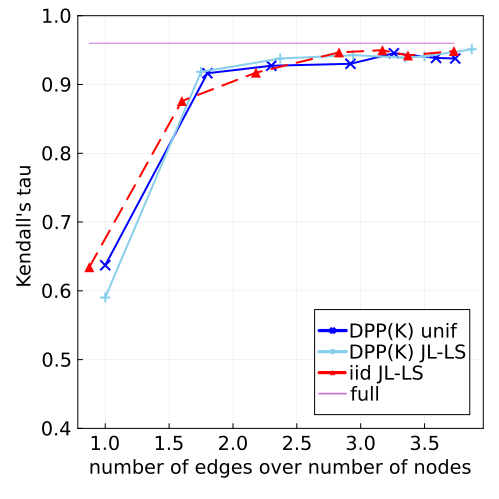

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"syncrank_tau_MUNn100p0.1eta0.3q0"

In [36]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (0.4, 1.)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
#savefig("figures/"*name*".pdf")

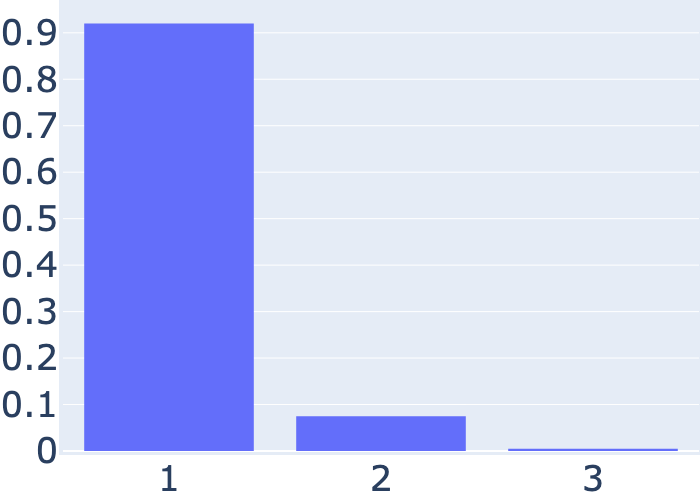

In [37]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
mtsf_weight = zeros(nb_samples)

for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    D = props(mtsf)
    w = D[:weight]
    mtsf_weight[i_sample] = w
end    

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)

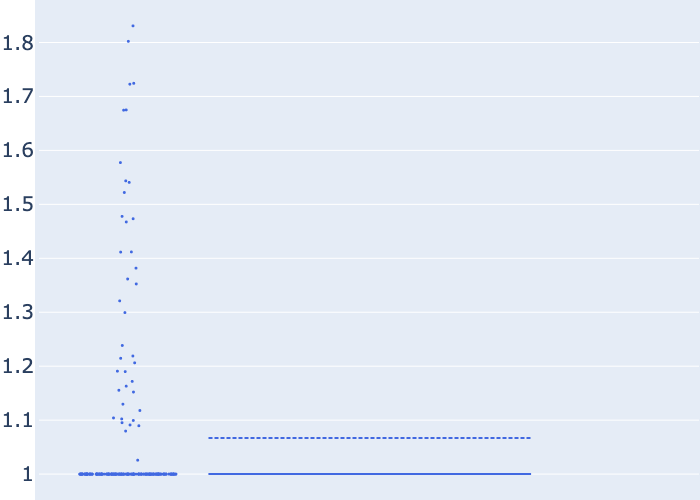

In [39]:
trace = box(y=(mtsf_weight),
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

name = "syncrank_"*"weight_of_MTSF"*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
#PlotlyJS.savefig(plt,"figures/"*name*".pdf")

 ERO graph model

least eigval of Laplacian= 0.016104706124001795
k = 

342 vs nb edges= 5012
 
method: DPP(K) unif
least eigenvalue of sparsifier: 2.2381418931409072e-5
least eigenvalue of sparsifier: 

0.007068646050134997


least eigenvalue of sparsifier: 0.013208353928389713
least eigenvalue of sparsifier: 

0.015087407097455045


least eigenvalue of sparsifier: 0.012582537692169354
least eigenvalue of sparsifier: 

0.014656421409420067


least eigenvalue of sparsifier: 0.015116288307836595
method: 

DPP(K) JL-LS
least eigenvalue of sparsifier: 1.3981402927225775e-5
least eigenvalue of sparsifier: 

0.007637507822445733


least eigenvalue of sparsifier: 0.010894116709008694
least eigenvalue of sparsifier: 

0.011845841573407075


least eigenvalue of sparsifier: 0.01475759963802356
least eigenvalue of sparsifier: 

0.013165894234177569


least eigenvalue of sparsifier: 0.014852768793385658
method: 

iid JL-LS
least eigenvalue of sparsifier: 1.2076465282744048e-7
least eigenvalue of sparsifier: 

7.582783106245853e-7


least eigenvalue of sparsifier: 0.0005253260080090431
least eigenvalue of sparsifier: 

0.011573197613347078


least eigenvalue of sparsifier: 0.011842624656095226
least eigenvalue of sparsifier: 

0.01003214451433297


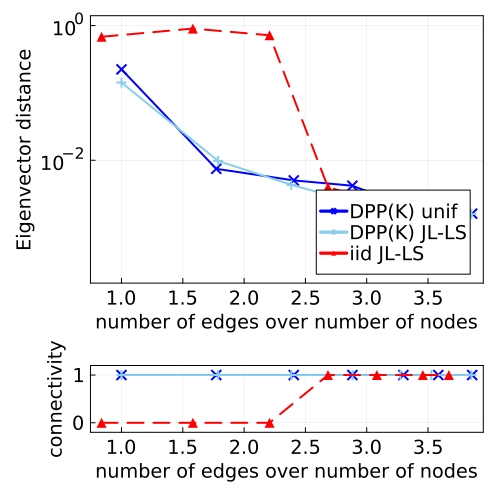

least eigenvalue of sparsifier: 0.01296471758322329


"syncrank_err_EROn1000p0.01eta0.02q0"

In [59]:
type = "ERO" 

rng = Random.default_rng()

# graph parameters
n = 1000
p = 0.01
eta = 0.02

# planted ranking score
planted_score = randperm(rng,n)

# graph model
if type=="MUN"
    meta_g = gen_graph_mun(rng, n, p, eta;planted_score)
elseif type=="ERO"
    meta_g = gen_graph_ero(rng, n, p, eta;planted_score)
end

# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# storing settings
D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)

# print least eigenvalues
# B = magnetic_incidence(meta_g)
# l = eigvals(B' * B)
# println("least eigenvalue: ", l[1:3])

methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

check_connected = true
D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods,check_connected)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# # saving plot
# savefig("figures/"*name*".pdf")

# # saving results
# save("figures/"*name*"_data.jld", "D_results", D_results,"D_params", D_params)

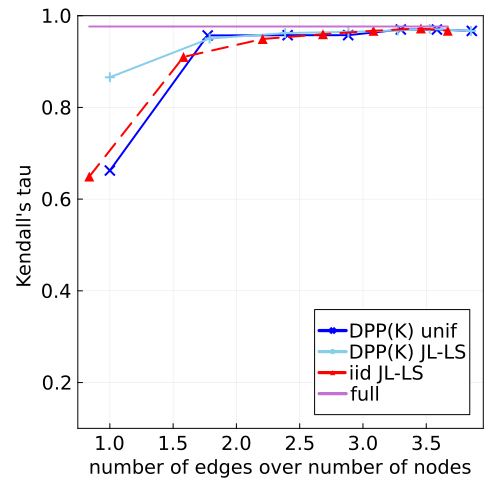

┌ Warning: Skipped yaxis arg linear
└ @ Plots /Users/mfanuel/.julia/packages/Plots/sxUvK/src/axes.jl:76


"syncrank_tau_EROn1000p0.01eta0.02q0"

In [60]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (0.1, 1.)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
#savefig("figures/"*name*".pdf")

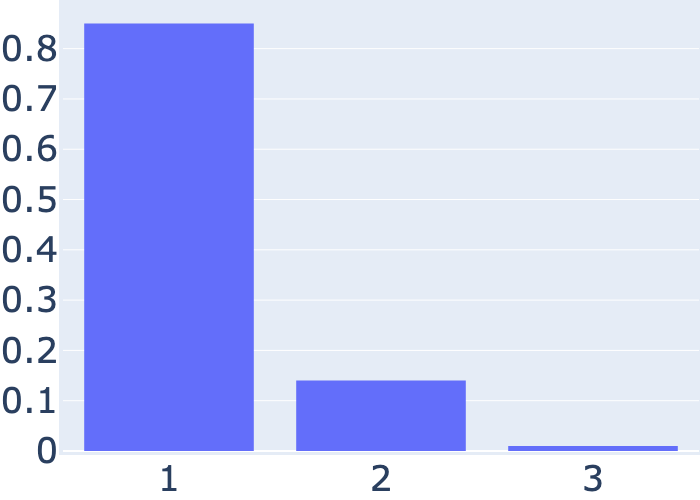

In [61]:
nb_samples = 200
nb_cycles = zeros(nb_samples)
mtsf_weight = zeros(nb_samples)

for i_sample in 1:nb_samples
    mtsf = multi_type_spanning_forest(rng, meta_g, q)

    # check nb roots and cycles
    cycles = get_prop(mtsf, :cycle_nodes)
    nb_cycles[i_sample] = length(cycles)
    D = props(mtsf)
    w = D[:weight]
    mtsf_weight[i_sample] = w
end    

cat_nb_cycles = string.(sort(Int.(nb_cycles)))
trace = PlotlyJS.histogram(x=cat_nb_cycles, histnorm="probability density")
layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=35,
    xaxis_type="category",
)
p = PlotlyJS.plot(trace,layout)

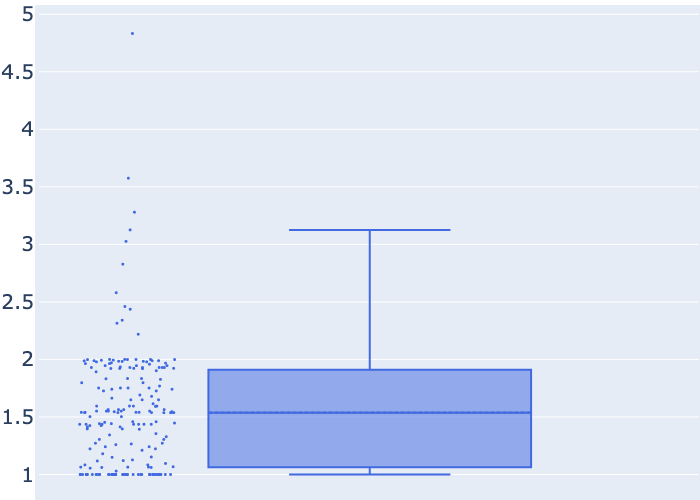

In [62]:
trace = box(y=(mtsf_weight),
boxpoints="all",
marker=attr(
        color="LightSkyBlue",
        size=3),
quartilemethod="linear",
name="",
marker_color="royalblue",
boxmean=true)

layout = Layout(
    autosize=false,
    width=500,
    height=200,
    margin=attr(l=1, r=1, b=1, t=1, pad=4),
    font_size=20,
)
PlotlyJS.plot(trace,layout)

name = "syncrank_"*"weight_of_MTSF"*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

plt = PlotlyJS.plot(trace,layout)
#PlotlyJS.savefig(plt,"figures/"*name*".pdf")

SBM MUN


In [ ]:
rng = Random.default_rng()

# graph parameters
n = 400
p_in = 0.2
p_out = 0.001
η = 0.1
#noise = 0.3

# planted ranking score
planted_score = randperm(rng,n)


meta_g = MetaGraph(n)
ic = false
while !ic
    if type=="MUN"
        meta_g = ero_mun_sbm(rng,n,p_in,p_out,η,noise;planted_score)
    elseif type=="ERO"
        meta_g = ero_mun_sbm(rng,n,p_in,p_out,η,noise;planted_score)
    end
    ic = is_connected(meta_g)
end
println("connected graph generated with m/n = ", ne(meta_g) / nv(meta_g))



# simulation parameters
n_batch = 7 # maximum number of batches considered
n_rep = 1 # number of runs

# regularization parameter
q = 0

# # storing settings
# D_params = Dict("n" => n,"p" => p,"eta" => eta,"q" => q,"n_batch" => n_batch,"n_rep" => n_rep)


methods = [
    "DPP(K) unif",
    "DPP(K) JL-LS",
    #"DPP(K) LS",
    "iid JL-LS",
    # "iid LS",
    #"ST JL-LS",
    # "ST LS",
]

D_results = benchmark_syncrank(meta_g,planted_score, n_batch, n_rep, rng; methods)
# plotting distance between eigenvectors
metric= "err"
y_limits = (1.5*1e-4, 1.4)
legendposition=:topright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)
name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")

In [ ]:
# plotting Kendall's tau between rankings

metric= "tau" 
y_limits = (1.5*1e-4, 1.1)

legendposition=:bottomright
plot_comparison_sync(metric,D_results,y_limits;legendposition,methods)

name = "syncrank_"*metric*"_"*type*"n"*string(n)*"p"*string(p)*"eta"*string(eta)*"q"*string(q)

# saving plot
savefig("figures/"*name*".pdf")